File Names: 

In [1]:
causes_of_death = 'assignment2Data/causes_of_death.csv'
framingham = 'assignment2Data/framingham.csv'
auto_fuel_consolidated = 'assignment2Data/vehicles.csv'

In [2]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import sem, t
from scipy import mean

-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------


Issue 1: 
You are to investigate the the fuel economy for vehicles using gasoline from the years 2000 to 2019. We are interested in the vehicles sold be the companies General Motors, Ford, Chrysler, 
Honda and Toyota. Note that some companies like GM and Chrysler have sub-brands. For example Cadillac and Chevrolet are GM products. The U.S. government reports MPG (miles per gallon) in three way: city, highway and combined. We are only interested in combined MPG.

--------------------------------------------------------------------------------------------------------------

Solution: 

For the analysis, the data has the following assumptions
1. For the car companies I have considered the data of below companies and their brands

    a. GMC = ["Buick", "Cadillac" , "Chevrolet" , "GMC", "Holden", "Wuling", "La Salle",
              "McLaughlin", "Oakland", "Oldsmobile", "Opel", "Pontiac", "Hummer", "Saab", "Saturn", "Vauxhall"]
    b. Chrysler = ["Abarth", "Alfa Romeo", "Chrysler", "Dodge", "Fiat", "Fiat Professional",\
                       "Jeep", "Lancia", "Maserati", "Ram"]
    c. Honda = ["HONDA","ACURA"]
    d. Toyota = ["TOYOTA","LEXUS"]
    e. Ford = ["FORD", "LINCOLN"]

2. For Fuel Type, I have considered only Gasoline (Regular, Premium, Midgrade). I have omitted Electric, Hybrid, CNG, LPG, Diesel and other fuel types
   
    Note 2.a Hybrid vehicles use gasoline as the primary fuel type and electric battery as an alternative source which is charged when the brakes are applied,
   Hence the combined mileage is more for hybrid vehicles and are not considered here.

    Note 2.b I have considered atv Vehicles (Alternative fuel vehicles) that have FFV (Flexible Fuel Vehicle) which means
    the vehicle supports alternative fuel types like Ethanol. As I am using 'comb08' column to get the combined MPG, which
    only contains data for fuel Type1 i.e. gasoline

3. Data available for vehicles from 1984-2020. For this analysis I have considered the data from 2000 to 2019


In [3]:
GM_brand_list = ["Buick", "Cadillac" , "Chevrolet" , "GMC", "Holden", "Wuling", "La Salle", \
              "McLaughlin", "Oakland", "Oldsmobile", "Opel", "Pontiac", "Hummer", "Saab", "Saturn", "Vauxhall"]
GM_brand_list = [element.upper() for element in GM_brand_list]

Chrysler_brand_list = ["Abarth", "Alfa Romeo", "Chrysler", "Dodge", "Fiat", "Fiat Professional",\
                       "Jeep", "Lancia", "Maserati", "Ram"]
Chrysler_brand_list = [element.upper() for element in Chrysler_brand_list]

GM_brand_set = set(GM_brand_list)
Chrysler_brand_set = set(Chrysler_brand_list)
Honda_brand_set = set(["HONDA","ACURA"])
Toyota_brand_set = set(["TOYOTA","LEXUS"])
Ford_brand_set = set(["FORD","LINCOLN"])

fueltype_set = set(["Regular Gasoline","Premium Gasoline", "Midgrade Gasoline"])
year_set = set(list(range(2000,2020)))

all_companies_set = set.union(GM_brand_set, Chrysler_brand_set, Honda_brand_set, Toyota_brand_set, Ford_brand_set)

try:
    vehicles_complete_file = pd.read_csv(auto_fuel_consolidated, error_bad_lines = False, warn_bad_lines=False)
except Exception as e:
    print("Error in File : "+ auto_fuel_files[i])
    print(e)
    
vehicles_complete_file.head()

def getCompany(row):
    if row['make'].upper() in GM_brand_set:
        return 'GM'
    if row['make'].upper() in Honda_brand_set:
        return 'HONDA'
    if row['make'].upper() in Toyota_brand_set:
        return 'TOYOTA'
    if row['make'].upper() in Chrysler_brand_set:
        return 'CHRYSLER'
    if row['make'].upper() in Ford_brand_set:
        return 'FORD'

vehicles_complete_file = vehicles_complete_file[vehicles_complete_file['atvType'].isnull() | vehicles_complete_file['atvType'].eq('FFV')]

vehicles_complete_file = vehicles_complete_file[vehicles_complete_file['make'].str.upper().isin(all_companies_set)]

vehicles_complete_file = vehicles_complete_file[vehicles_complete_file['fuelType1'].isin(fueltype_set)]

vehicles_complete_file = vehicles_complete_file[vehicles_complete_file['year'].isin(year_set)]

vehicles_complete_file['company_name'] = vehicles_complete_file.apply(lambda row: getCompany (row),axis=1)

vehicles_complete_file = vehicles_complete_file[['make', 'comb08', 'year', 'company_name', 'fuelType1', 'model']]
company_to_data_dict = dict(tuple(vehicles_complete_file.groupby('company_name')))


/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (73,74,76) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1. For each company collect the MPG sold by each company in the years 2000-2019. Produce the box plots per company for the MPG over those years. How do the companies compare?

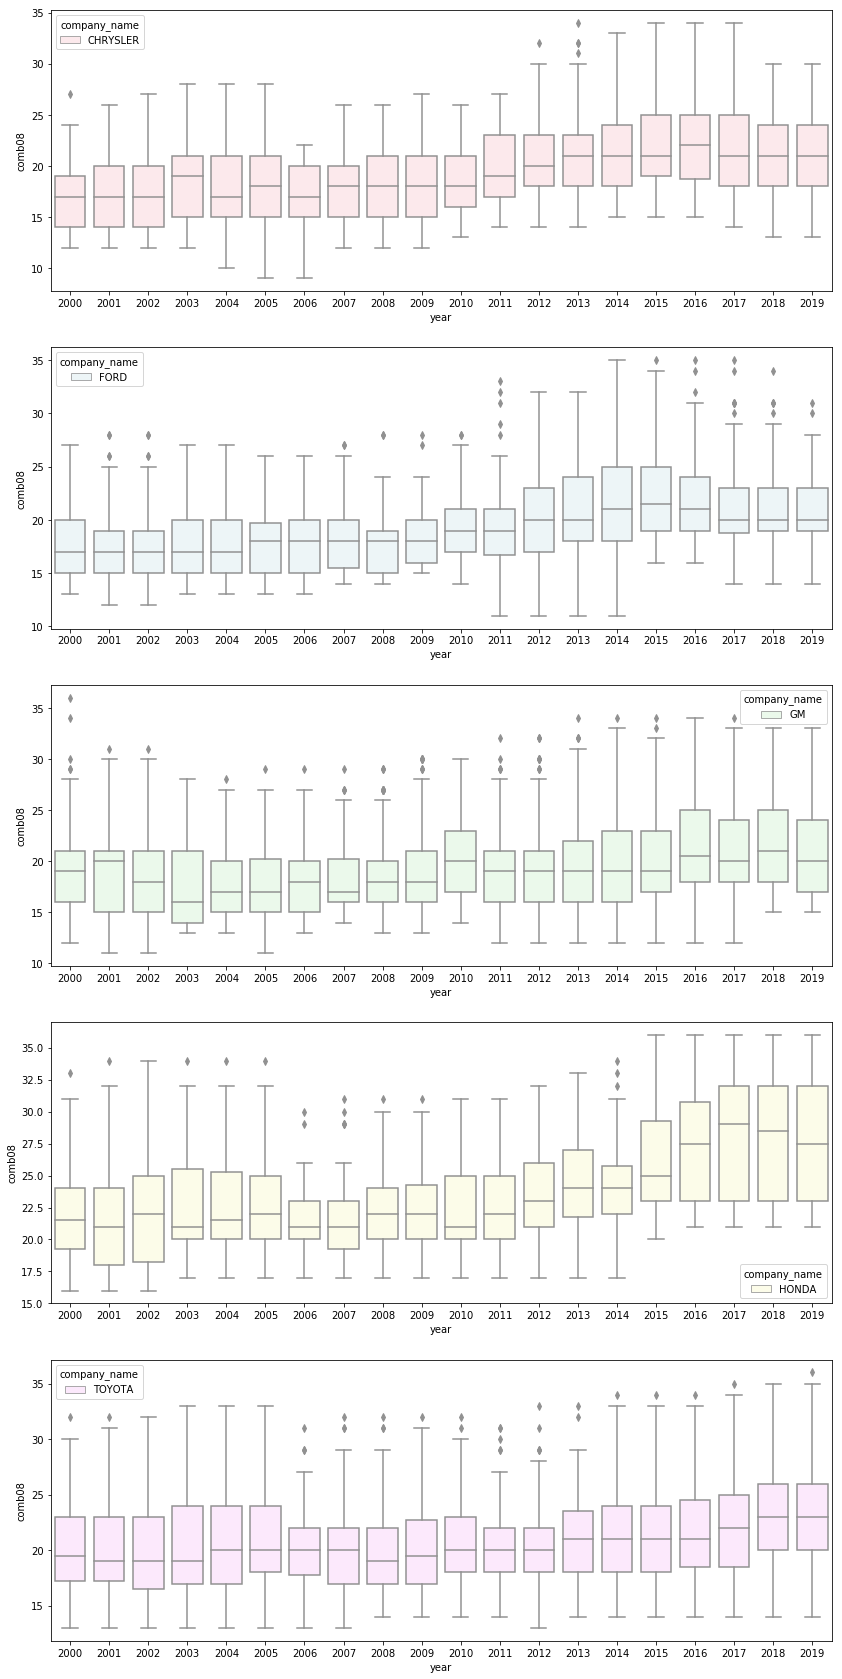

In [4]:
figure = plt.figure(figsize=(14, len(company_to_data_dict)*6)) #(width, height)
i = 1
colors = ['pink', 'lightblue', 'lightgreen', 'lightyellow', 'purple']
for key in company_to_data_dict:
    figure.add_subplot(len(company_to_data_dict), 1, i)
    sns.boxplot(x="year", y="comb08", hue="company_name", data=company_to_data_dict[key], color=colors[i-1])  
    i+=1

Analysis : 

Chrysler :
In all years except 2006, we see that the length of whisker is longer on the upper side than the lower side, so Chrysler is trying to make atleast one vehicles model with higher MPG.

Toyota:
In years 2002-05,2018, we see that the length of whisker is longer on the upper side than the lower side and no outliers, so Toyota is trying to make atleast one vehicles model with higher MPG.
and, for the rest of the years we see that the length of whisker is longer on the upper side than the lower side and there is atleast one outlier on the upper side which indicates that , Toyota is trying to make one or more vehicles model with higher MPG.

GM:
In years 2003, 2010, 2016, 2018, 2019, we see that the length of whisker is longer on the upper side than the lower side and no outliers, so GM is trying to make atleast one vehicles model with higher MPG.
and, for the rest of the years we see that the length of whisker is longer on the upper side than the lower side and there is atleast one outlier on the upper side which indicates that , GM is trying to make one or more vehicles model with higher MPG.

Honda
In years 2002, 2010-13, 2015-19, we see that the length of whisker is longer on the upper side than the lower side and no outliers, so Honda is trying to make atleast one vehicles model with higher MPG.
and, for the rest of the years we see that the length of whisker is longer on the upper side than the lower side and there is atleast one outlier on the upper side which indicates that , Honda is trying to make one or more vehicles model with higher MPG.

Ford
In years 2000, 2003-06, 2012-14, we see that the length of whisker is longer on the upper side than the lower side and no outliers, so Ford is trying to make atleast one vehicles model with higher MPG.
and, for the rest of the years we see that the length of whisker is longer on the upper side than the lower side and there is atleast one outlier on the upper side which indicates that , Ford is trying to make one or more vehicles model with higher MPG.


-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------

2. Plot the yearly mean in the years 2000- 2019 with confidence interval of the mpg for each 
company. That is for each company compute the mean mpg over all vehicles sold by that 
company per year. What changes have there been in those years? How do the companies 
compare?

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Mean and confidence interval plot for All Companies')

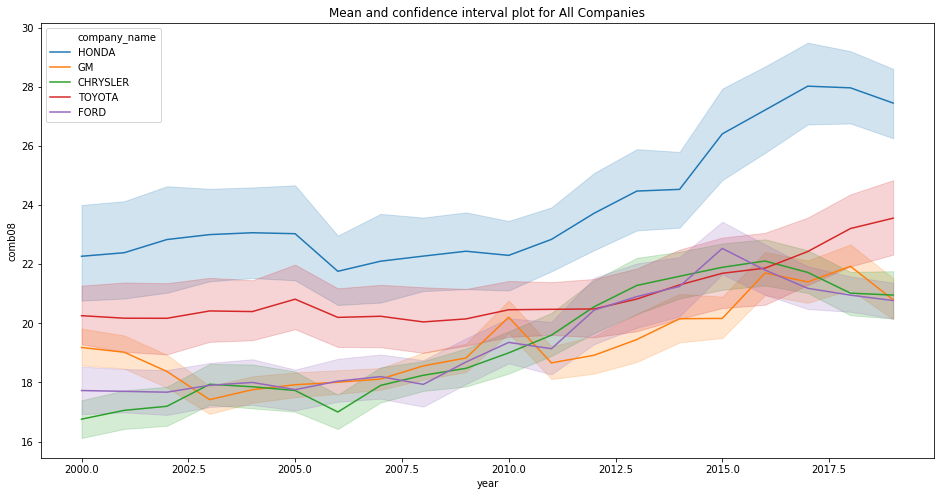

In [5]:
figure = plt.figure(figsize=(16, 8))
sns.lineplot(x="year", y="comb08", data=vehicles_complete_file, hue = 'company_name').set_title('Mean and confidence interval plot for All Companies')

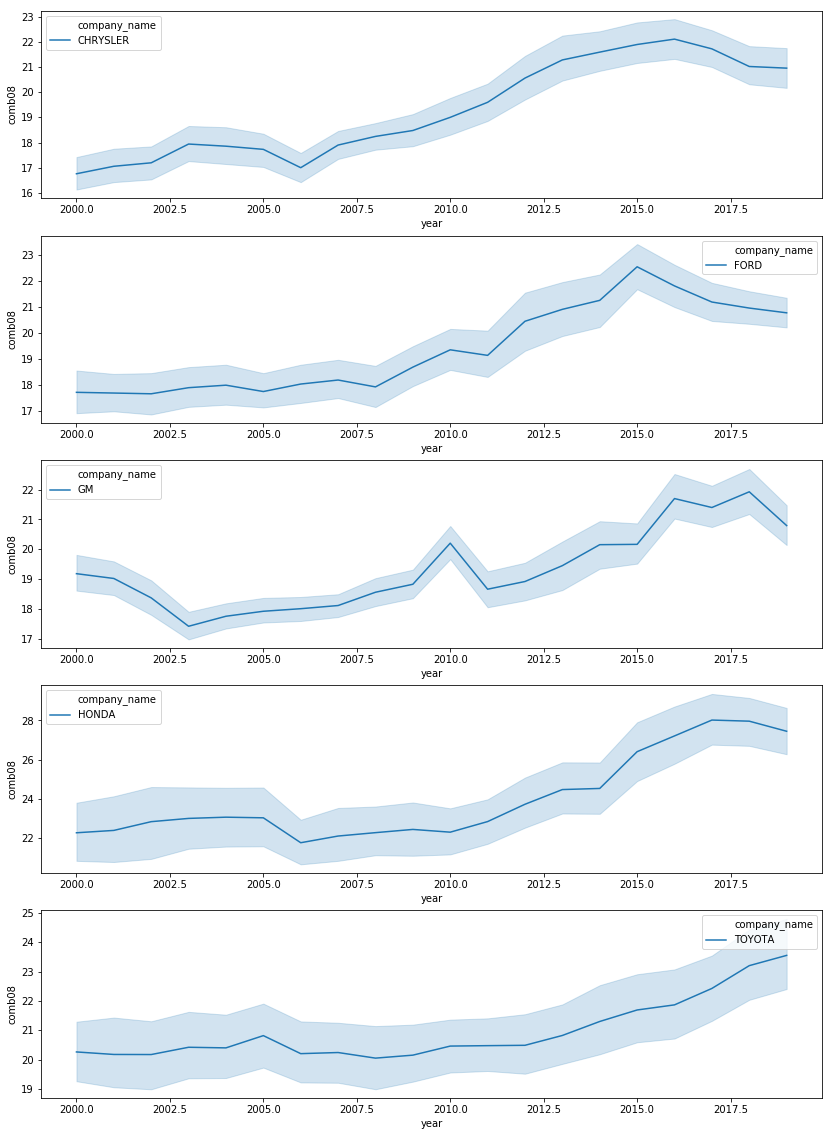

In [6]:
figure = plt.figure(figsize=(14, len(company_to_data_dict)*4)) #(width, height)
i = 1
for key in company_to_data_dict:
    figure.add_subplot(len(company_to_data_dict), 1, i)
    sns.lineplot(x="year", y="comb08", hue="company_name", data=company_to_data_dict[key]) 
    i+=1

Overall for all car companies, the mean MPG has an increasing trend. 

 Chrysler and Ford, the mean MPG has seen a slight decline since 2015.
And Honda and GM have seen a slight decline since 2017. 

The confidence interval for all the companies does not change a lot, even though the MPG is increasing  which indicates that companies keep producing the vehicles in same range around the mean.

GM has the widest confidence level, which means that it has more diverse MPG amongst the companies.


-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------

3. Plot the mpg for each company per year of their most fuel efficient vehicle each year. What 
changes have there been in those years? How do the companies compare?

Text(0.5, 1.0, 'Most Fuel efficient Vehicle plot for All Companies')

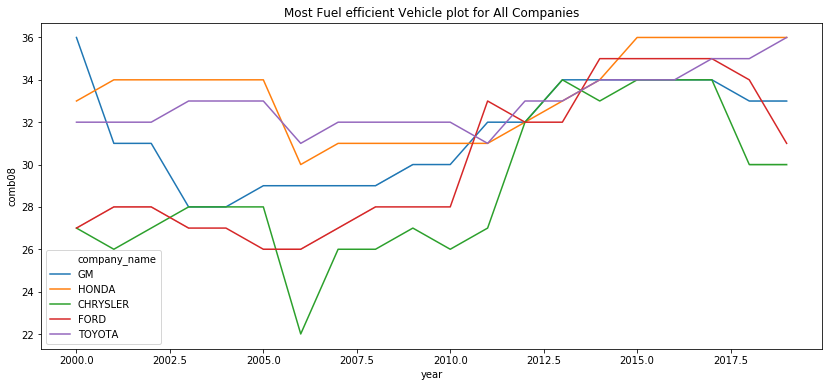

In [7]:
figure = plt.figure(figsize=(14, 6)) #(width, height)
idx = vehicles_complete_file.groupby(['company_name','year'])['comb08'].transform(max) == vehicles_complete_file['comb08']
company_most_fuel_effi = vehicles_complete_file[idx]
sns.lineplot(x="year", y="comb08", data=company_most_fuel_effi, hue = 'company_name').set_title('Most Fuel efficient Vehicle plot for All Companies')

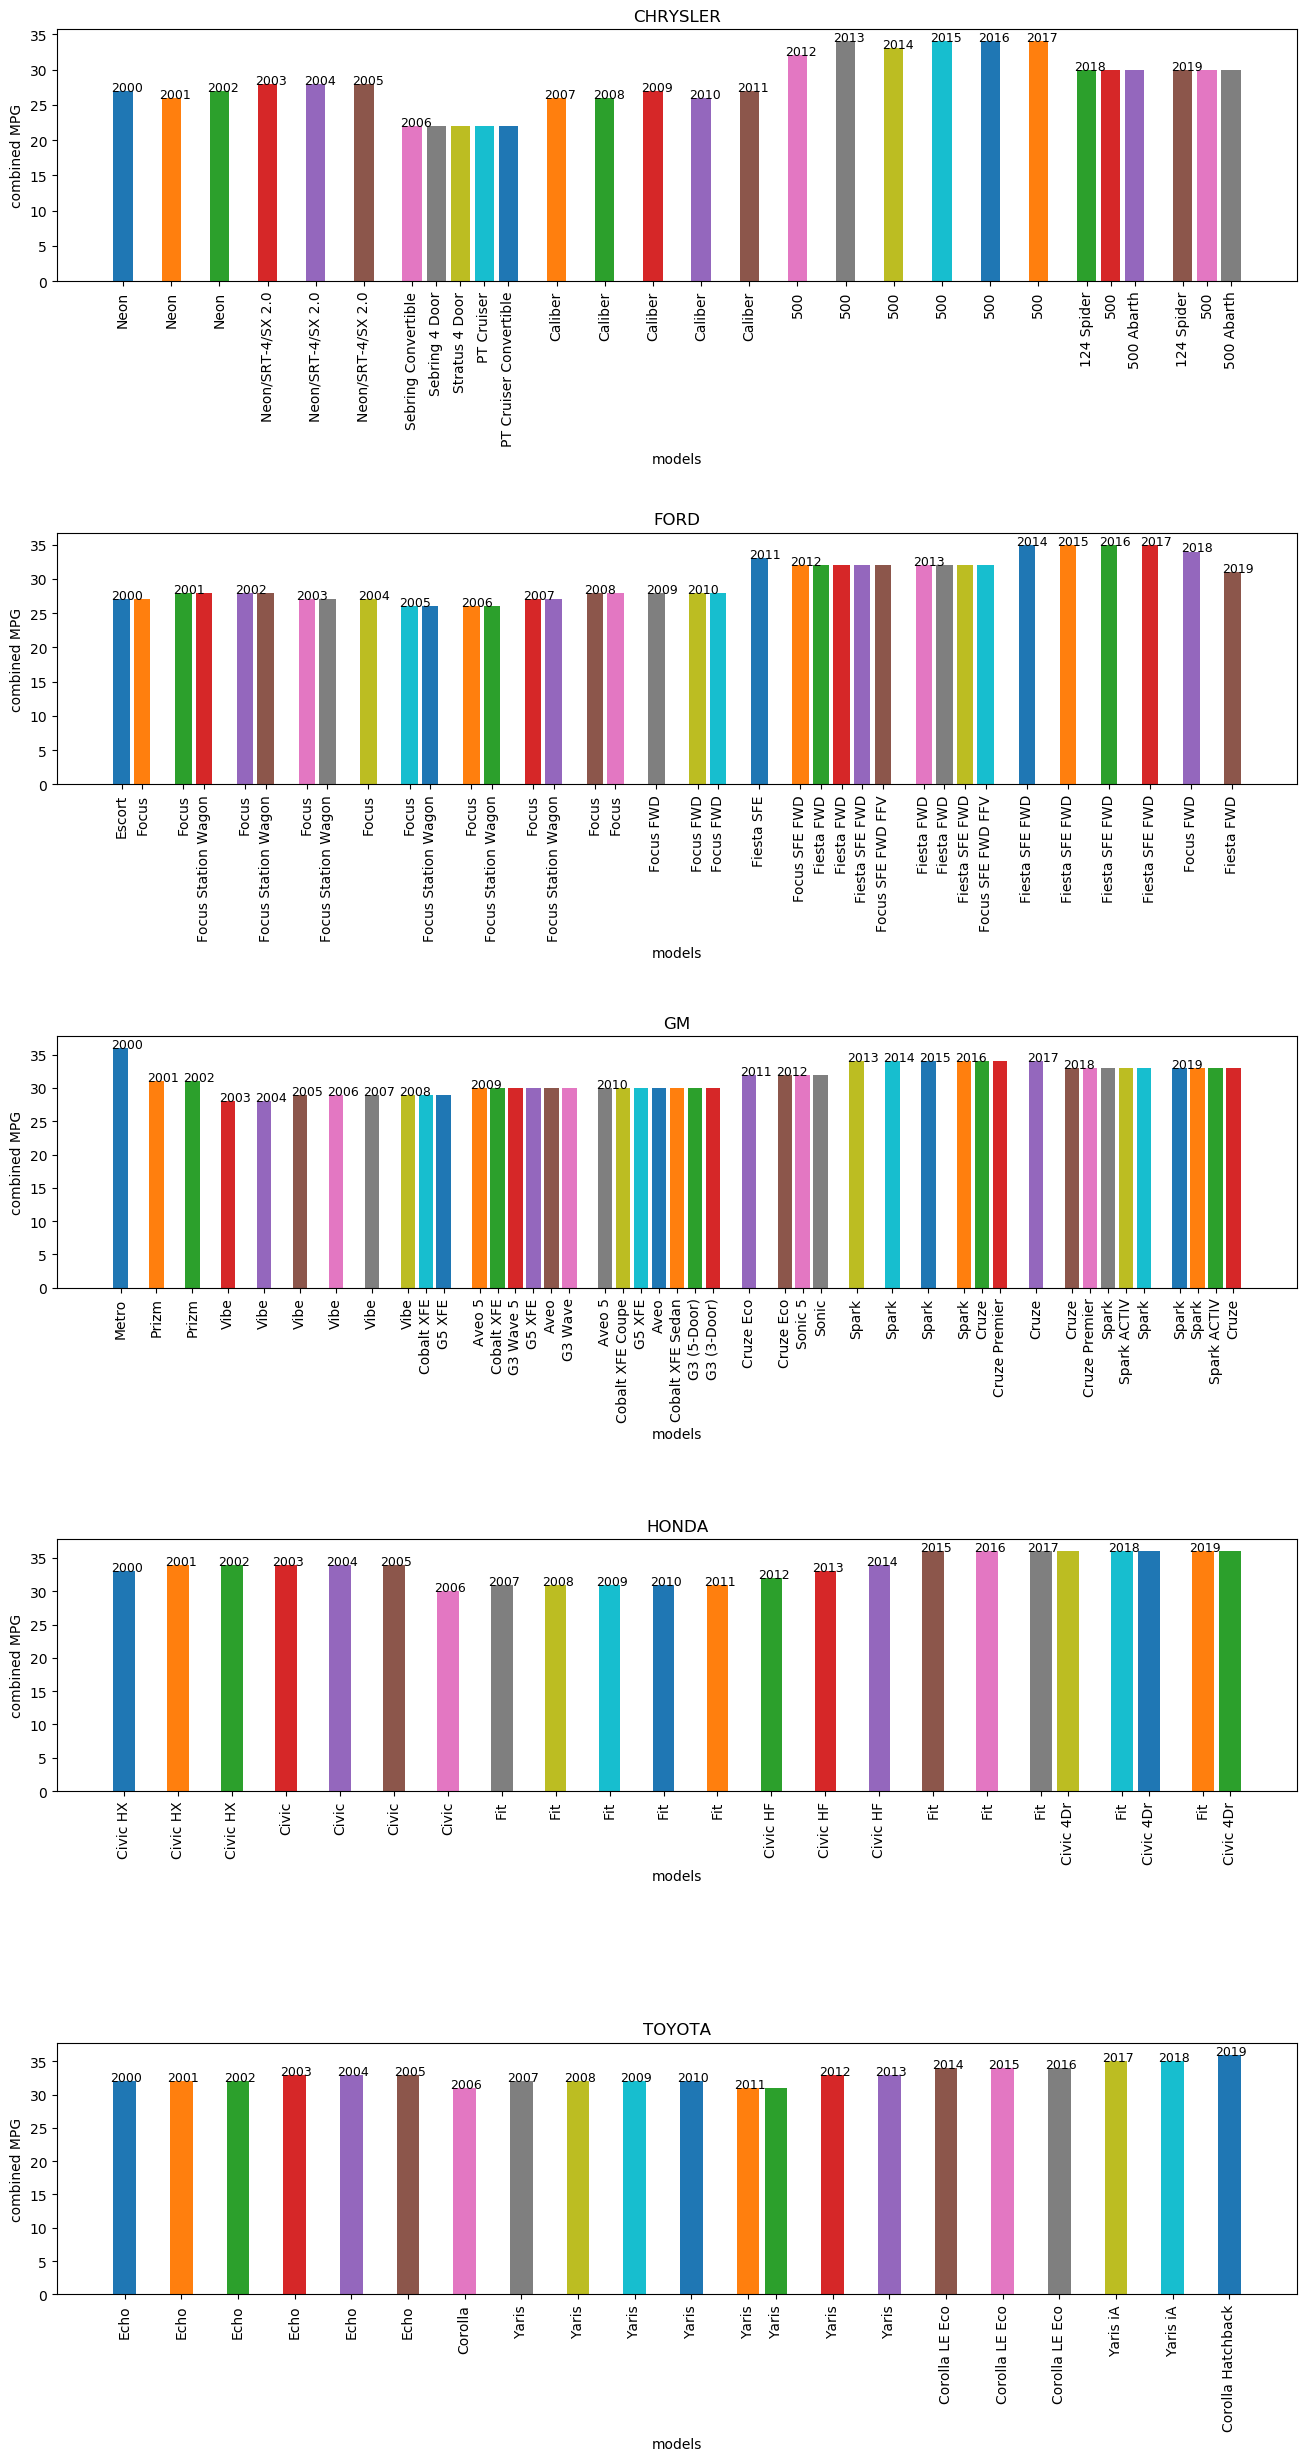

In [8]:
company_most_fuel_effi_grouped = dict(tuple(company_most_fuel_effi.groupby('company_name')));
figure = plt.figure(1, figsize=(16, len(company_to_data_dict)*6), frameon=False, dpi=100)
i = 1
barWidth = 0.9

for key in company_most_fuel_effi_grouped:
    data=company_most_fuel_effi_grouped[key].reset_index()
    fig = figure.add_subplot(len(company_most_fuel_effi_grouped), 1, i)
    for index, row in data.iterrows():
        bar = plt.bar(index+row.year, row.comb08)
        
    i+=1
    plt.xticks([index+row.year for index, row in data.iterrows()],data.model, rotation=90)

    prev='1983'
    for index, row in data.iterrows():
        if prev == row.year:
            continue
        plt.text(x=index+row.year - 0.5,y=row.comb08,s=row.year, size=9)
        prev = row.year
        
    plt.ylabel('combined MPG')
    plt.xlabel('models')
    plt.title(key)

figure.subplots_adjust(hspace=1)

    

Analysis :

As shown in the combined plot Honda and Toyota have produced the most Fuel efficient model over the years.

Now Comparing Individual Companies and their most fuel efficient vehicles over the years.

Chrysler : Overall for all the years , MPG of Chrysler vehicles have an increasing trend. For years 2006, 2018 and 2019 it seemed to have declined. The model Neon had the highest mpg among other brands of Chrysler vehicles till 2005. They stopped producing Neon from 2006. I think that is the reason why the mpg declined in year 2006. In 2006 Sebring, Stratus and PT had the highest MPG. Caliber stayed at the top consistently from year 2007 to 2011. In the year 2012, Fiat 500 had the highest mpg and it stayed till 2017. For year 2018 and 2019 the other models of Fiat i.e Fiat Spider and Fiat 500 Abarth shared the highest mpg rank with Fiat 500.
Ford: Ford had a tough competition between its two models Focus and Fiesta. The model Focus was consistently the most fuel efficient vehicle among other brands of Ford vehicles from year 2000 to 2013. Fiesta shared the highest mpg spot with Focus from years 2011 to 2013 and then from 2014 to 2017 it had the spot only for itself. Focus took the spot back in 2018 and Fiesta took the spot back again by small margin.

Honda: Honda has a tough competition between its two models Civic and Fit for the most fuel efficient vehicle. For 10 years Civic is most efficient and for 8 years its Fit. And for last 3 years 2017-19 both cars have same fuel efficiency.

Toyota: For the years under consideration, Toyota has Echo(6 years), Corolla(5 years) and Yaris(9 years) as its most Fuel Efficient Vehicle. Echo is from 2000-04. A version of Corolla is for 2005, 2015-17 & 2019. And for the rest of years between 2007-13 and 2017-18 Yaris takes the spot of most fuel efficient vehicle. In 2011, there are two models of Yaris that are most fuel efficient.

GM: In the years 2009, 2010, 2018, 2019 has four or more models that are the most fuel  under GM brands. In the initials years 2003-08 Vibe is the most fuel efficient whereas in the later years from 2013-19 (except 2017)  onwards Spark (gasoline) is the consistently one of the most fuel efficient vehicles that GM brand produced. 


-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------

Issue 2. Diet and Death

Causes of death. Plot the death rate for each disease over time from the data set causes_of_death.csv.

<Figure size 1440x432 with 0 Axes>

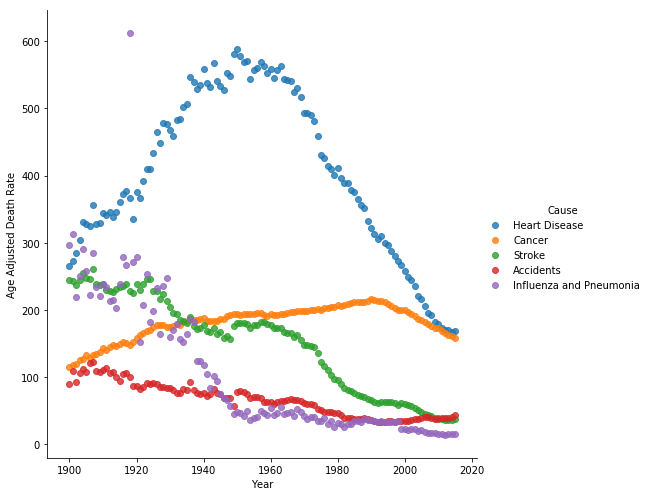

In [9]:
causes_of_death_df = pd.read_csv(causes_of_death)
figure = plt.figure(figsize=(20,6))

sns.lmplot(x='Year', y='Age Adjusted Death Rate', 
           data=causes_of_death_df, 
           height=7,
           fit_reg=False,
           hue='Cause')

In [10]:
def get_confidence_interval(data, confidence):
    size = len(data)
    mean, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., size-1)
    print([mean - h, mean + h])


-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------

4. What is the percentage of people in the study that have diabetes?
Now we need to compare this to the general population. Either a person is diagnosed as having diabetes or not. We can use the multinomial distribution to generate a sample of two values. Say we have an event that has .75 probability of occurring. Then the following will count 
the number of times the event does not occur and not occur in a sample of 1000.
two_value_probabilities = [0.25, 0.75]
sample_size = 1000
np.random.multinomial(sample_size, two_value_probabilities) Using this we can compute the number of people we would expect to have diabetes in a sample of 5,000, which we need to convert to a percentage. Now do this 200 times.

In [11]:
framingham_df = pd.read_csv(framingham)

total_people_with_diabetes = framingham_df['DIABETES'].sum()
sample_size = len(framingham_df['DIABETES'])
diabetes_percentage = total_people_with_diabetes / sample_size

print(diabetes_percentage)

two_value_probabilities = [diabetes_percentage, 1 - diabetes_percentage]

diabetes_study_sample_200 = np.random.multinomial(5000, two_value_probabilities, 200)

diabetes_study_sample_200_percentage = np.true_divide(diabetes_study_sample_200, diabetes_study_sample_200.sum(axis=1, keepdims=True))

print("Percentage of people in the study that have diabates is : " + str(diabetes_percentage))

print("\nPercentage of people expected to have diabetes in a sample of 5,000, done 200 times : ")

print(diabetes_study_sample_200_percentage)


0.02732951587714732
Percentage of people in the study that have diabates is : 0.02732951587714732

Percentage of people expected to have diabetes in a sample of 5,000, done 200 times : 
[[0.0272 0.9728]
 [0.0248 0.9752]
 [0.0302 0.9698]
 [0.0322 0.9678]
 [0.0266 0.9734]
 [0.0244 0.9756]
 [0.024  0.976 ]
 [0.0278 0.9722]
 [0.0258 0.9742]
 [0.0254 0.9746]
 [0.0274 0.9726]
 [0.033  0.967 ]
 [0.0246 0.9754]
 [0.0224 0.9776]
 [0.0306 0.9694]
 [0.028  0.972 ]
 [0.0284 0.9716]
 [0.0246 0.9754]
 [0.0254 0.9746]
 [0.022  0.978 ]
 [0.0318 0.9682]
 [0.0242 0.9758]
 [0.0264 0.9736]
 [0.0296 0.9704]
 [0.0292 0.9708]
 [0.0268 0.9732]
 [0.0262 0.9738]
 [0.03   0.97  ]
 [0.0302 0.9698]
 [0.0304 0.9696]
 [0.0262 0.9738]
 [0.0272 0.9728]
 [0.0316 0.9684]
 [0.0272 0.9728]
 [0.0242 0.9758]
 [0.0292 0.9708]
 [0.0286 0.9714]
 [0.0246 0.9754]
 [0.0292 0.9708]
 [0.0264 0.9736]
 [0.0284 0.9716]
 [0.0238 0.9762]
 [0.028  0.972 ]
 [0.0274 0.9726]
 [0.023  0.977 ]
 [0.0292 0.9708]
 [0.0248 0.9752]
 [0.0224 0.9776

-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------

5. Produce the histogram of the percent of people in your 200 samples with diabetes

(array([ 6., 13., 31., 33., 35., 33., 31.,  5.,  9.,  4.]),
 array([0.022 , 0.0232, 0.0244, 0.0256, 0.0268, 0.028 , 0.0292, 0.0304,
        0.0316, 0.0328, 0.034 ]),
 <a list of 10 Patch objects>)

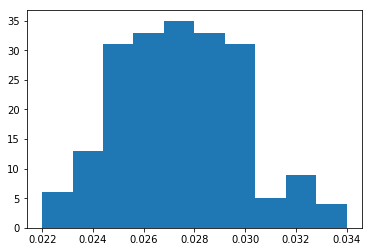

In [12]:
plt.hist([i[0] for i in diabetes_study_sample_200_percentage])

-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------

6. Compute the 95% confidence interval of the 200 values in #5

In [13]:
diabetes_percentage = 1.0 * np.array([i[0] for i in diabetes_study_sample_200_percentage])

print("The 95% confidence interval of the 200 values in #5 is : ")
get_confidence_interval(diabetes_percentage, 0.95)

The 95% confidence interval of the 200 values in #5 is : 
[0.026996838223479078, 0.02767516177652092]


-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------

7. Is the study representative of the general population? Why or why not?

Answer:  This study is not representative of the general population.

Reason : The CDC indicates that prevalence (percent) of diabetes was 0.93% i.e 0.0093 at the time of the study. The confidence interval calculated based on the data from framingham file is [0.02682, 0.02746]. The study contains data  for the adults from age 32 and above, it doesn't have data for the adults of age between 20-32. That might be the reason why the CDC result doesn't fall in the confidence interval calculated for framingham study. Hence I reject the null hypothesis and conclude that this study is an altenative hypothesis.

-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------

8. Plot the cholesterol values for the people with heart disease, for the people with out heart 
disease.

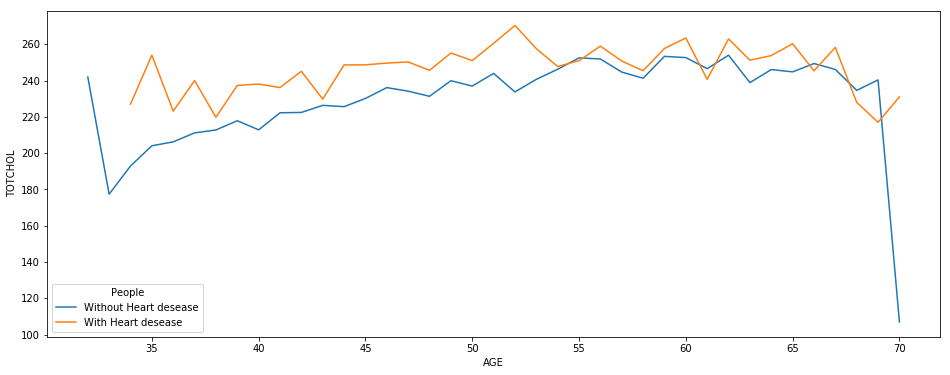

In [14]:
figure = plt.figure(figsize=(16,6))
ax = sns.lineplot(x="AGE", y="TOTCHOL", data=framingham_df, hue = 'ANYCHD', ci = None)
new_title = 'People'
new_labels = []
    
leg = ax.get_legend()
handles, labels = ax.get_legend_handles_labels()
for l in labels:
    if l == '1':
        new_labels.append('With Heart desease')
    elif l == '0':
        new_labels.append('Without Heart desease')
        
ax.legend(handles=handles[1:], labels=new_labels, title=new_title)


-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------

9. Compute the 95% confidence interval of the cholesterol values for the people with heart 
disease, for the people with out heart disease.

In [15]:
with_hd = framingham_df.loc[framingham_df['ANYCHD'] == 1]
cholestrol_with_hd = 1.0 * np.array(with_hd['TOTCHOL'])
print("The 95% confidence interval of the cholesterol values for the people with heart disease: ")
get_confidence_interval(cholestrol_with_hd, 0.95)

without_hd = framingham_df.loc[framingham_df['ANYCHD'] == 0]
cholestrol_without_hd = 1.0 * np.array(without_hd['TOTCHOL'])
print("\nThe 95% confidence interval of the cholesterol values for the people without heart disease: ")
get_confidence_interval(cholestrol_without_hd, 0.95)

The 95% confidence interval of the cholesterol values for the people with heart disease: 
[246.5403082552965, 252.42405233170558]

The 95% confidence interval of the cholesterol values for the people without heart disease: 
[231.25983474347473, 234.43268603214855]


10. What can we deduce about cholesterol values and heart disease?

Answer : The study indicates that cholesterol level is directly associated with heard disease for the people with ages from 32 to 55. After age 55 there are other factors which contribute for the heart disease. Hence the graph in Q#8 indicates that for age 55 and above the cholesterol contributes for the heart disease along with other factors.